In [1]:
import pandas as pd
import matplotlib as mt
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder
from collections import Counter
pd.set_option('display.max_rows', 30)
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 20} 
axes= {'linewidth':2}
mt.rc('axes',**axes)
mt.rc('font', **font)

In [4]:
SEED=42
np.random.seed(SEED)

In [5]:
df = pd.read_excel('INITIAL DATA12.xlsx')
df.info()
df1=df.drop(['PHASE'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DELTA_R                  111 non-null    float64
 1   DELTA_Hmix               111 non-null    float64
 2   DELTA_Smix               111 non-null    float64
 3   Delta electronegativity  111 non-null    float64
 4   VEC                      111 non-null    float64
 5   PHASE                    111 non-null    object 
dtypes: float64(5), object(1)
memory usage: 5.3+ KB


In [6]:
df.isna().sum()

DELTA_R                    0
DELTA_Hmix                 0
DELTA_Smix                 0
Delta electronegativity    0
VEC                        0
PHASE                      0
dtype: int64

In [7]:
df1.corr()

,DELTA_R,DELTA_Hmix,DELTA_Smix,Delta electronegativity,VEC
DELTA_R,1.000000,-0.074442,0.144289,0.278089,-0.355255
DELTA_Hmix,-0.074442,1.000000,-0.255454,-0.014703,0.058033
DELTA_Smix,0.144289,-0.255454,1.000000,0.104955,-0.042704
Delta electronegativity,0.278089,-0.014703,0.104955,1.000000,-0.182511
VEC,-0.355255,0.058033,-0.042704,-0.182511,1.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import linear_model

In [9]:
X = df.drop(['PHASE'],axis=1)
y=df['PHASE']

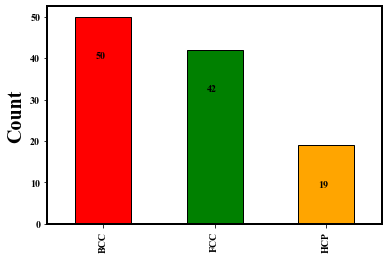

In [171]:
colors=['r','g','orange']
ax=df.PHASE.value_counts().plot(kind='bar',edgecolor = 'black',color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.18, p.get_height()-10.05),fontweight='bold')
plt.ylabel('Count',fontweight='bold',fontsize=20)
plt.savefig('counts.jpg',dpi=1000,bbox_inches='tight')

In [11]:
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

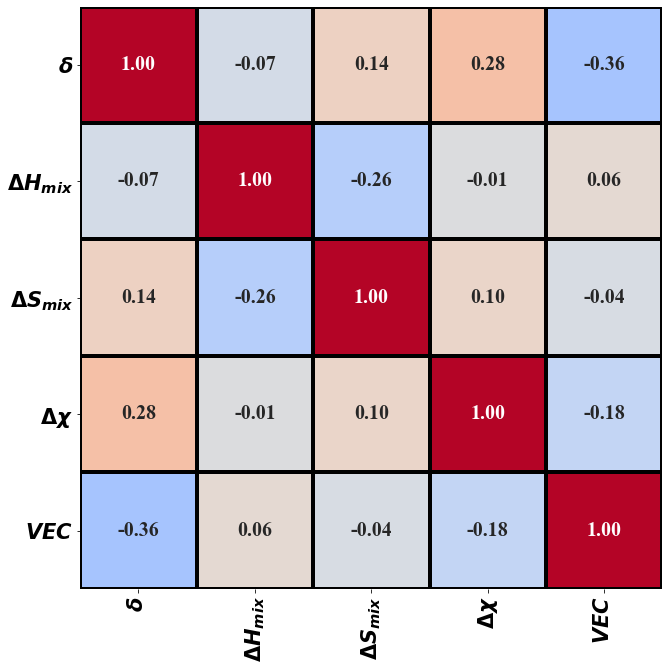

In [12]:
def HeatMap(df,x=True):
        correlations = df1.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap='coolwarm', center=0, fmt='.2f',square=True, linewidths=3,linecolor='k',annot=x,cbar=False)
        plt.rcParams.update({"font.size":30})
        plt.rcParams["font.family"]="Times New Roman"
        plt.rcParams["font.weight"]= 'bold'
        xticklabels=['$\delta $','$\Delta H_{mix}$','$\Delta S_{mix}$','$\Delta \chi$','$VEC$']
        yticklabels=['$\delta $','$\Delta H_{mix}$','$\Delta S_{mix}$','$\Delta \chi$','$VEC$']
        fig.set_xticklabels(xticklabels, rotation = 90, fontsize = 21,fontweight='bold')
        fig.set_yticklabels(yticklabels, rotation = 0,ha='right', fontsize = 21,fontweight='bold')
        plt.tight_layout()
        plt.show()
        figure = fig.get_figure()    
        figure.savefig('svm_conf12.jpg',dpi=1000)
HeatMap(df,x=True)

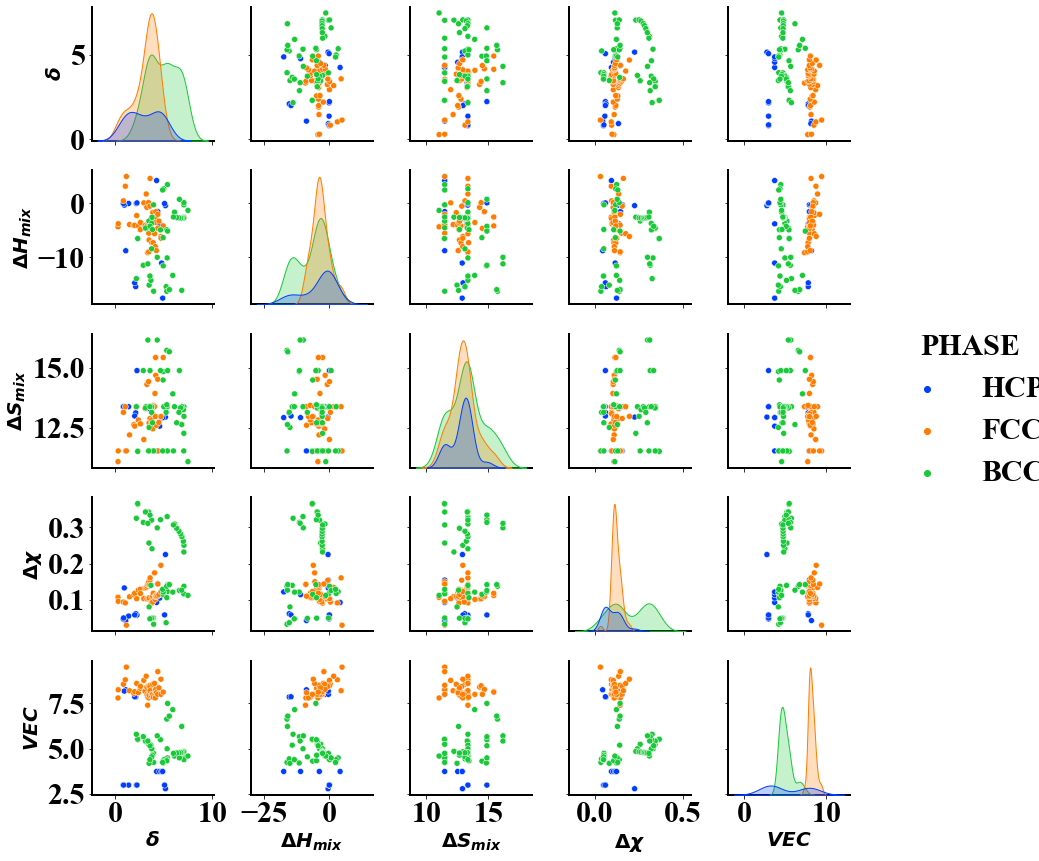

In [13]:
g=sns.pairplot(data=df,hue='PHASE',palette='bright')
replacements = ({'DELTA_R': '$\delta $', 'DELTA_Hmix': '$\Delta H_{mix}$','DELTA_Smix':'$\Delta S_{mix}$' ,'Delta electronegativity': '$\Delta \chi$', 'VEC': '$VEC$',
                0:'BCC',1:'FCC',2:'HCP'})
for i in range(5):
    for j in range(5):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel],fontweight='bold',fontsize=20)
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel],fontweight='bold',fontsize=20)
for i in range(len(g.fig.get_children()[-1].texts)):
    label = g.fig.get_children()[-1].texts[i].get_text()
    if label in replacements.keys():
        g.fig.get_children()[-1].texts[i].set_text(replacements[label])
g._legend.set_bbox_to_anchor((1, 0.5))
plt.savefig('pairplo12.jpg',dpi=1000)

In [307]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
phase_cat_encoded = encoder.fit_transform(df["PHASE"])
phase_cat = encoder.inverse_transform(phase_cat_encoded)

In [308]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [309]:
data_scaled = scaler.fit_transform(df[df.columns[0:5]])
data_transform = pd.DataFrame(data_scaled[0:, 0:])

In [310]:
data_transform["PHASE"] = phase_cat_encoded

In [311]:
Y = pd.get_dummies(data_transform["PHASE"]).values

In [312]:
X, y = data_transform[[col for col in data_transform.columns if col != 'PHASE']], Y

In [313]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [314]:
X_sm1 , y_sm1 = smote.fit_sample(X,y)
X_sm , y_sm = X_sm1 , y_sm1

In [315]:
scaler = MinMaxScaler()
X_sm = scaler.fit_transform(X_sm)

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.35, random_state=SEED)

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline

In [101]:
log = LogisticRegression()  
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rtree = RandomForestClassifier()
svm = SVC()
nb = GaussianNB()
gbc = GradientBoostingClassifier()
etree = ExtraTreesClassifier()

In [104]:
def baseline_model(model_name):
    model = model_name
    steps = list()
    steps.append(('ss', MinMaxScaler() ))
    steps.append(('ml', model))
    pipeline = Pipeline(steps=steps)
    cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=SEED)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    scores=100*scores
    print(model,'Accuracy: %.3f' % (mean(scores)))
    print('Std: %.3f'%  np.std(scores))

In [105]:
baseline_model(log)
baseline_model(knn)
baseline_model(dtree)
baseline_model(rtree)
baseline_model(svm)
baseline_model(nb)
baseline_model(gbc)
baseline_model(etree)

LogisticRegression() Accuracy: 78.298
Std: 9.602
KNeighborsClassifier() Accuracy: 77.263
Std: 8.502
DecisionTreeClassifier() Accuracy: 82.737
Std: 9.250
RandomForestClassifier() Accuracy: 86.614
Std: 7.783
SVC() Accuracy: 83.825
Std: 8.495
GaussianNB() Accuracy: 82.754
Std: 7.441
GradientBoostingClassifier() Accuracy: 85.912
Std: 7.731
ExtraTreesClassifier() Accuracy: 91.368
Std: 5.999


In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
%%time
#logistic regression classifier

#define hyper parameters and ranges
param_grid_log = [{'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear'], 
                   'max_iter':[100, 300]}]
#apply gridsearch
grid_log  = GridSearchCV(log, param_grid=param_grid_log, cv=5)
#fit model with grid search
grid_log.fit(X_train, y_train)
print('The best parameters for log classifier: ', grid_log.best_params_)

The best parameters for log classifier:  {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Wall time: 321 ms


In [108]:
#kNN classifier

#define hyper parameters and ranges
param_grid_knn = [{'n_neighbors': [2, 3, 4, 6, 8, 10], 'weights': [ 'uniform', 'distance'], 
                   'metric': ['euclidean', 'manhattan', 'minkowski']}]
#apply gridsearch
grid_knn  = GridSearchCV(knn, param_grid=param_grid_knn, cv=4)
#fit model with grid search
grid_knn.fit(X_train, y_train)
print('The best parameters for knn classifier: ', grid_knn.best_params_)

The best parameters for knn classifier:  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [109]:
%%time
#SVM classifier

#define hyper parameters and ranges
param_grid_svm = [{'C': [100, 50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'], 
                   'kernel': ['poly', 'rbf', 'sigmoid'] }]
#apply gridsearch
grid_svm  = GridSearchCV(svm, param_grid=param_grid_svm, cv=4)
#fit model with grid search
grid_svm.fit(X_train, y_train)
print('The best parameters for svm classifier: ', grid_svm.best_params_)

The best parameters for svm classifier:  {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Wall time: 193 ms


In [110]:
%%time
#gbc classifier
#define hyper parameters and ranges
param_grid_gbc = [{'learning_rate': [0.1, 1], 'n_estimators':[200,350,500]}]
#apply gridsearch
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=SEED)
grid_gbc  = GridSearchCV(gbc, param_grid=param_grid_gbc, cv=cv)
#fit model with grid search
grid_gbc.fit(X_train, y_train)
print('The best parameters for gbc classifier: ', grid_gbc.best_params_)

The best parameters for gbc classifier:  {'learning_rate': 0.1, 'n_estimators': 500}
Wall time: 1min 7s


In [111]:
%%time
#etree classifier
#define hyper parameters and ranges
param_grid_etree = [{'max_depth': [15, 20, 25, 30, 35], 'n_estimators':[200,350,500] , 
                     'criterion': ['gini',  'entropy']}]
#apply gridsearch
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=SEED)
grid_etree  = GridSearchCV(etree, param_grid=param_grid_etree, cv=cv)
#fit model with grid search
grid_etree.fit(X_train, y_train)
print('The best parameters for etree classifier: ', grid_etree.best_params_)

The best parameters for etree classifier:  {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 350}
Wall time: 2min 56s


In [112]:
# define Classifiers with hyper params
log_hp = LogisticRegression(C = 0.1, solver = 'liblinear', max_iter= 100 ) 
knn_hp = KNeighborsClassifier(metric = 'manhattan', n_neighbors=4,weights= 'distance')
dtree_hp = DecisionTreeClassifier(criterion = 'entropy', max_depth=30)
rtree_hp = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=500)
svm_hp = SVC(C=100, gamma= 'scale', kernel='rbf')  
nb_hp = GaussianNB()
gbc_hp = GradientBoostingClassifier(learning_rate=1, n_estimators=350)
etree_hp = ExtraTreesClassifier(criterion='gini', max_depth=25, n_estimators=350)

In [113]:
%%time
baseline_model(log_hp)
baseline_model(knn_hp)
baseline_model(dtree_hp)
baseline_model(rtree_hp)
baseline_model(svm_hp)
baseline_model(nb_hp)
baseline_model(gbc_hp)
baseline_model(etree_hp)

LogisticRegression(C=0.1, solver='liblinear') Accuracy: 77.649
Std: 8.038
KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance') Accuracy: 88.632
Std: 7.479
DecisionTreeClassifier(criterion='entropy', max_depth=30) Accuracy: 85.544
Std: 7.511
RandomForestClassifier(max_depth=5, n_estimators=500) Accuracy: 87.281
Std: 7.615
SVC(C=100) Accuracy: 87.965
Std: 9.023
GaussianNB() Accuracy: 82.754
Std: 7.441
GradientBoostingClassifier(learning_rate=1, n_estimators=350) Accuracy: 89.351
Std: 7.264
ExtraTreesClassifier(max_depth=25, n_estimators=350) Accuracy: 91.404
Std: 6.550
Wall time: 7.44 s


In [291]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support

In [317]:
model_et=etree_hp
model_et.fit(X_train, y_train)
y_pred_et = model_et.predict(X_test)
predictions=y_pred_et

In [318]:
y_pred_et= np.argmax(y_pred_et, axis=1)
y_test_cm = np.argmax(y_test, axis = 1)

In [294]:
y_pred_et

array([0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2,
       1, 0, 2, 2, 0, 0, 0, 0, 0], dtype=int64)

In [295]:
y_test_cm

array([0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 0, 0], dtype=int64)

In [296]:
cm=confusion_matrix(y_test_cm, y_pred_et)
cm

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 1,  1, 17]], dtype=int64)

In [297]:
print(classification_report(y_test_cm, y_pred_et))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



In [298]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [299]:
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
  
    fig,ax = plt.subplots(1, 1, figsize=(7,7))

    plt.xlabel("Training Examples",font='Times New Roman',fontweight='bold',fontsize=25)
    plt.ylabel("Accuracy Score",font='Times New Roman',fontweight='bold',fontsize=25)

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = (np.mean(train_scores, axis=1))*100
    train_scores_std = (np.std(train_scores, axis=1))*100
    test_scores_mean = (np.mean(test_scores, axis=1))*100
    test_scores_std = (np.std(test_scores, axis=1))*100
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    leg=plt.legend(loc='lower right',prop={'size':20})
    leg.get_frame().set_edgecolor('k')
    return plt

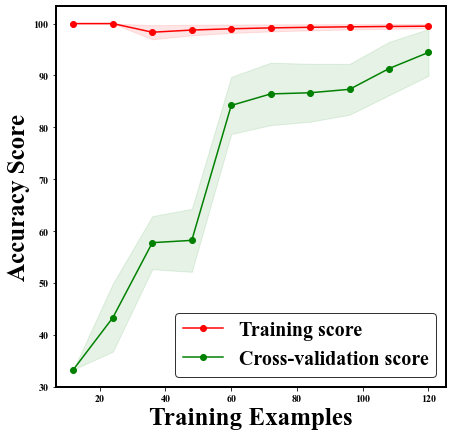

In [122]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=SEED)
plot_learning_curve(models[7][1],  X_sm, y_sm, ylim=(0.1, 1.01), cv=cv, n_jobs=3)
plt.grid(False)
#plt.savefig('lr.jpg',bbox_inches='tight')

In [300]:
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

In [301]:
clf = OneVsRestClassifier(ExtraTreesClassifier())
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

In [302]:
y_test

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

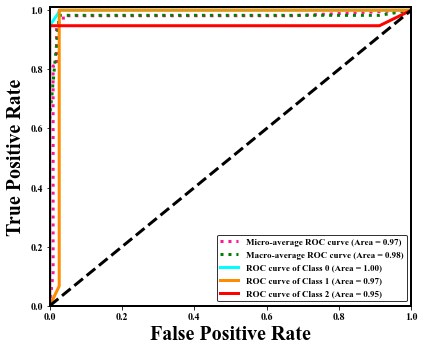

In [303]:
lw = 3
nclasses=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.figure(figsize=(6,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (Area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=3)
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (Area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=3)
colors = cycle(['aqua', 'darkorange', 'red'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of Class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=20)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=20)
leg=plt.legend(loc='lower right',prop={'size':9})
leg.get_frame().set_edgecolor('k')
plt.tight_layout()
#plt.savefig('ROC.jpg',dpi=1000,bbox_inches='tight')
plt.show()